<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Выявление-и-заполнение-пропущенных-значений" data-toc-modified-id="Выявление-и-заполнение-пропущенных-значений-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Выявление и заполнение пропущенных значений</a></span></li><li><span><a href="#Обработка-аномалий" data-toc-modified-id="Обработка-аномалий-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обработка аномалий</a></span></li><li><span><a href="#Преобразование-типа-данных" data-toc-modified-id="Преобразование-типа-данных-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Преобразование типа данных</a></span></li><li><span><a href="#Обработка-дубликатов" data-toc-modified-id="Обработка-дубликатов-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Обработка дубликатов</a></span></li><li><span><a href="#Создание-словарей" data-toc-modified-id="Создание-словарей-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Создание словарей</a></span></li><li><span><a href="#Создание-категориальных-переменных" data-toc-modified-id="Создание-категориальных-переменных-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Создание категориальных переменных</a></span></li></ul></li><li><span><a href="#Ответы-на-поставленные-вопросы" data-toc-modified-id="Ответы-на-поставленные-вопросы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Ответы на поставленные вопросы</a></span></li><li><span><a href="#Итоговые-выводы" data-toc-modified-id="Итоговые-выводы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Итоговые выводы</a></span></li></ul></div>

# Исследование надёжности заёмщиков

## Описание проекта

**Заказчик** — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. 

Другими словами, в ходе работы будет необходимо ответить на следующие вопросы:
* Есть ли зависимость между количеством детей и возвратом кредита в срок?
* Есть ли зависимость между семейным положением и возвратом кредита в срок?
* Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
* Как разные цели кредита влияют на его возврат в срок?

**Входные данные от банка** — статистика о платёжеспособности клиентов.
Результаты исследования будут учтены при построении модели *кредитного скоринга* — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

**Ход исследования**

Исследование будет состоять из 4 основных этапов:
 1. Описание проекта.
 2. Обзор данных.
 3. Предобработка данных.
    - Выявление и заполнение пропущенных значений.
    - Обработка аномалий.
    - Преобразование типа данных.
    - Обработка дубликатов.
    - Создание словарей.
    - Создание категориальных переменных.
 4. Ответы на поставленные вопросы.
 5. Итоговые выводы.

## Обзор данных

Для начала импортируем все необходимые для работы библиотеки.

In [1]:
import pandas as pd

Теперь перейдем к непосредственной работе с данными. Загрузим данные в систему и сохраним их в переменной `data`.

In [2]:
data = pd.read_csv('/datasets/data.csv')

Сначала выведем несколько первых строк имеющихся данных, а потом просмотрим основную информацию по ним.

In [3]:
data.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [5]:
data.shape

(21525, 12)

Что мы можем сказать относительно полученной информации? Во-первых, в датафрейме имеется 12 столбцов, содержащих различную информацию о заемщиках банка. А именно:
* `children` — количество детей в семье
* `days_employed` — общий трудовой стаж в днях
* `dob_years` — возраст клиента в годах
* `education` — уровень образования клиента
* `education_id` — идентификатор уровня образования
* `family_status` — семейное положение
* `family_status_id` — идентификатор семейного положения
* `gender` — пол клиента
* `income_type` — тип занятости
* `debt` — имел ли задолженность по возврату кредитов
* `total_income` — ежемесячный доход
* `purpose` — цель получения кредита

Некоторые строки имеют тип `object`. В них хранится нечисловая информация о заемщиках - уровень образования, статус семьи, пол, тип дохода и цель займа. Так же в данных присутствуют столбцы с типом `float` и `int` - числовые значения. 

Уже на этом этапе легко заметить некоторые трудности и несовершенства предоставленных данных, относительно которых необходимо будет сделать дополнительную работу. Так, количество наблюдений в разных столбцах разнятся, что говорит о проблеме **пропущенных значений**. Так же в столбце, отвечающем за количество дней трудоустройства, наблюдаются **аномалии** - отрицательные значения, которые противоречат здравому смыслу. При текущем уровне анализа довольно сложно говорить о наличии или отсутствии **дубликатов**, однако наличие **одних и тех же значений в некоторых столбцах, записанных по-разному**, может привести к этой проблеме. 

## Предобработка данных

### Выявление и заполнение пропущенных значений

Теперь, проведя общий анализ данных и выявив основные несовершенства, можно преступать к предобрадотке данных. Начнем с выявления и заполнения пропущенных значений. 

Посчитаем количество пропусков в каждом столбце.

In [6]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Как можно заметить, наблюадется наличие пропусков в двух столбцах: `days_employed` и `total_income`.

Проверим, какую долю составляют пропуски относительно общего числа наблюдений.

In [7]:
print('Доля пропусков в столбце total_income:', data['total_income'].isna().mean())
print('Доля пропусков в столбце days_employed:', data['days_employed'].isna().mean())

Доля пропусков в столбце total_income: 0.10099883855981417
Доля пропусков в столбце days_employed: 0.10099883855981417


Доля пропусков для обоих столбцов одинаковая и составляет 10% от общего числа наблюдений. 10% пропущенных значений при 21 тыс. наблюдений является существенным размером пропусков и их бездумное удаление может привести к потере значимых данных, вследствии чего могут измениться ответы на поставленные вопросы - а значит и достоверность этих ответов может подвергаться сомнению. В таком случае лучше искуственно заполнить пропуски.

На практике применяют несколько споосбов заполнения пропущенных значений:
* нулями или уникальными значениями 
* средним арифметическим 
* медианой

Для нашего кейса лучше всего подойдет заполнение пропусков медианой. Использование нулей или уникальных значений может существенно повлиять на полученный далее результат, а значит дать неверное представление о поведении заемщиков. Поскольку обе переменные являются числовыми, логичнее использовать для заполнения пропусков **характерные значения** - значения, которые наиболее точно характеризуют выборку. К ним относятся среднее арифметическое и медиана. Однако использование среднего арифметического для количественных переменных связано с высоким риском. Если в данных имеются **выбросы** - измерения, выделяющийся из общей выборки, - то, используя среднее, мы получим некорректные результаты. В таком случае лучше использовать медиану.

Заполним имеющиеся пропуски **медианным** значением и проверим, что после заполнения более пропусков не наблюдается. 

In [8]:
#отсортируем данные по каждой строке с пропуском и посчитаем для него медиану
days_employed_mean = data.sort_values(by= 'days_employed')['days_employed'].median()
total_income_mean = data.sort_values(by= 'total_income')['total_income'].median()
print('Медиана для "дней трудоустройства":', days_employed_mean)
print('Медиана для "ежемесячного дохода":', total_income_mean)
#заполним пропуски строк соответсвующими медианами
data['days_employed'] = data['days_employed'].fillna(days_employed_mean)
data['total_income'] = data['total_income'].fillna(total_income_mean)
#вновь проведем проверку на пропуски
data.isna().sum()

Медиана для "дней трудоустройства": -1203.369528770489
Медиана для "ежемесячного дохода": 145017.93753253992


children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

Как можно заметить, теперь в данных отсутствуют пропуски, а значит мы добились поставленной задачи - избавились от пропусков и не потеряли данные.

**Выводы**

Нами были выявлены и устранены пропуски в исходных данных. Это позволит не потерять сущесвенный объем выборки при последующих ответах на заданные вопросы.

Наконец, в завершении работы над пропусками немного порассуждаем на тему причин их появления в имеющихся данных. В исследуемом нами кейсе причина возникновения пропусков может быть тесно связана со столбцами, в которых эти самые пропуски и наблюдаются - `количество дней трудоустройства` и `общий доход`. Вполне возможно, что часть заемщиков не была когда-либо трудоустроена, и в таком случае, не имела доходов. Для подтверждения данной гипотезы можно было бы проверить, совпадают строки с пропусками в обоих столбцах, однако, поскольку это не имеет непосредственного отношения к поставленной нам задаче, отложим данное исследование до периода необходимости. Также, нельзя исключать случайную составлющую в появлениях пропусков - часть данных могла быть потеряна при выгрузке (или даже при загрузке данных в систему), или заемщики сами отказались предоставлять подобную информацию о себе - что, однако, является маловероятным событием в силу специфики кейса. 

### Обработка аномалий

Перейдем к следующему этапу предобработки данных. Займемся обработкой выявленных на первом этапе исследования **аномалий** - значений, которые не отражают действительность и появились по какой-то ошибке. Такие значения можно заметить в столбце `days_employed`. 

Изначально трудовой стаж дан в днях. Воспринимать такие данные двольно затруднительно - на практике трудовой стаж обычно исчисляется в годах и так легче определить, являются ли данные аномальными или нет. Создадим дополнительный столбец, который будет показывать трудовой стаж в годах и выведем график распределения его значений. 

array([[<AxesSubplot:title={'center':'years_employed'}>]], dtype=object)

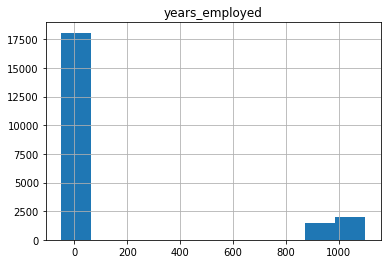

In [9]:
data['years_employed'] = data['days_employed']/365
data.hist(column = 'years_employed')

Оценивать трудовой стаж в годах намного проще. Что можно заметить из данного графика? Прежде всего, в глаза бросается наличие отрицательного трудового стажа. Это, определенно, является аномалией. Также настораживает наличие заемщиков, чей стаж превышает 800 лет.

Как можно исправить такие аномалии? В идеальной ситуации необходимо вновь обратиться к банку с проверкой, не произошел ли какой-нибудь сбой во время выгрузки данной колонки или не повлиял ли на это человеческий фактор невнимательности при заполнении. Однако в нашей ситуации такое решение недоступно, а значит придется обходится общими правилами логики и доступными средствами. 

Предположим, что отрицательные значения возникли из-за человеческого фактора - невнимательном заполнении данного столбца. Тогда нам будет необходимо взять модуль от таких значений и перезаписать иcходных датафрейм. Наличие у некоторых заемщиков чрезмерного размера трудового стажа так же может быть вызван ошибкой при записи значений. Предположим, что так оно и было. В качестве решения уменьшим данные значения до более реальных величин, поделив на 100.

array([[<AxesSubplot:title={'center':'years_employed'}>]], dtype=object)

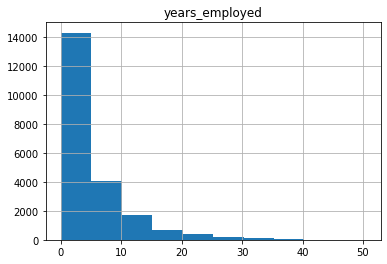

In [10]:
data['days_employed'] = abs(data['days_employed'])
data.loc[data['days_employed'] > 100000, 'days_employed'] = data['years_employed']/100
data['years_employed'] = data['days_employed']/365
data.hist(column = 'years_employed')

In [11]:
del data['years_employed']

Теперь значения переменной, отвечающей за трудовой стаж как в годах, так и в днях, выглядит куда более реалистично. Между тем, нельзя не отметить тот факт, что данные в любом случае были скорректированы на основе общих предположений о природе аномалий, что может не соответвовать действительности - в таком случае, если бы данная переменная была использована при дальнейшем анализе вероятности невозврата кредита, мы могли получить результат, который бы значительно отличался от реальности. Как уже упоминалось ранее, наиболее оптимальным решением было бы изначально проконсультироваться с заказчиком о природе данной аномалии. 

Вернемся к обработке аномалий с последнего пункта работы, в процессе работы над которым удалось выявить еще две аномалии - наличие отрицательного колличества детей и семей, с 20 детьми. За неимением дополнительной информации относительно того, в каких значениях и как заполнялась данная таблица, необходимо самостоятельно предположить причину таких странностей в данных и подобрать наиболее оптимальное решение для данной проблемы. 

In [12]:
data.groupby('children')['children'].count()

children
-1        47
 0     14149
 1      4818
 2      2055
 3       330
 4        41
 5         9
 20       76
Name: children, dtype: int64

Начнем с **отрицательного числа детей**. Во-первых, это может быть уникальное значение для тех заемщиков, кто отказался заполнять данный столбец. Во-вторых, возможно,есть часть заемщиков, которые потеряли единственного ребенка в процессе выплаты кредита и эту потерю учли подобным способом. В-третьих, возможно были совершены ошибки при заполнении информации о заемщиках, и на самом деле эти заемщики имеют одного ребенка. За неимением дополниетльной информации о заемщиках (а также отсутсвия возможности узнать подробнее о данных от заказчика проекта), остановимся на первом предположении - это уникальное значение для пропусков. 

Теперь порассуждаем о наличии **20 детей**. Прежде всего, нельзя не допустить вероятности того, что действительно в банк за займом обратились семьи, в которых было ровно 20 детей. Однако такая вероятность не только крайне мала, но и упирается в тот факт, что отсутсвуют заемщики с количеством детей от 6 до 19. Возможно, это специальное обозначение для семей, у которых более 5 детей. Наконец, такое уникальное значение могло возникнуть, опять таки, из-за опечатки при заполнении информации о заемщиках. Остановимся на данной версии. 

По итогу, нам необходимо обработать только один вид аномалий в данных о количествах детей - исправить 20 на 2.

In [13]:
data.loc[data['children'] == 20,'children'] = 2
data.groupby('children')['children'].count()

children
-1       47
 0    14149
 1     4818
 2     2131
 3      330
 4       41
 5        9
Name: children, dtype: int64

Так же хотелось бы обратить внимание на еще одну очень интересную аномалию, обнаруженную уже на финальном этапе работы. Среди заемщиков присутсвуют индивиды с нулевым возрастом. Наиболее вероятная причина возникновения такой ошибки - пропуск некоторой цифры перед нулем. Восстановить исходное значение аномалии без дополниетльной информации невозможно, однако для текущего кейса допустимо оставить эту аномалию необработанной - данная колонка не используется при дальнейшем анализе.

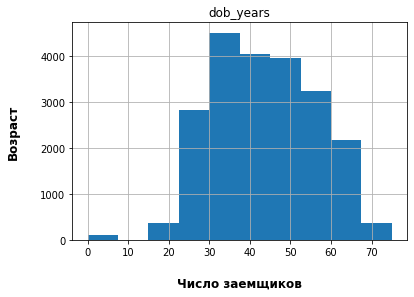

In [14]:
ax = data.hist(column = 'dob_years')
ax = ax[0]
for x in ax:
    # Set x-axis label
    x.set_xlabel("Число заемщиков", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Возраст", labelpad=20, weight='bold', size=12)

**Вывод**

Нами была проведена работа над выявлением и обработкой аномалий. Некоторые аномалии были легко обнаружены при первичном анализе данных, другие же удалось обнаружить лишь на финальном этапе работы, вследствии чего приходилось возвращаться и совершать дополнительные действия над данными. 

Всего аномалии были обнаружены у трех переменных - `days_employed`, `children` и `dob_years`. Наиболее существенными для дальнейшей работы оказались аномалии в колличестве детей у заемщиков. Также непростой была работа по обработке аномалий в трудовом стаже, поскольку большое число наблюдений выпадало из категории "отражающие действительность". 

Еще раз затронем тему **причин** возникновений таких вот аномалий в данных, кратко объединив все тезисы, упоминаемые в данном блоке. Прежде всего, аномалии могли возникнуть по ошибке при выгрузке или копировании данных из системы, а также общем сбое системы. Во-вторых, причина аномалий может быть обоснована человеческим фактором - неправильное ручное заполнение некоторых ячеек или простая невнимательность. Наконец, нельзя не допустить вариант ведения заказчиком специфического учета какой-нибудь характеристики - особенно если имеется большое количество аномалий. Обрабатка таких аномалий, используя общую логику и здравый смысл, может привести к существенному искажению результатов, а значит необходимо в первую очередь уточнить у заказчика возникшую особенность в данных.

### Преобразование типа данных

Перейдем к третьему этапу предобработки данных - преобразованию типа данных. На данном этапе переведем значения столбца `total_income` к целочисленным значениям. Это облегчит дальнейшую работу с данным столбцом. 

Сменим тип данных на `int` и выведем общую информацию о типах данных чтобы убедиться, что преобразование прошло успешно. 

In [15]:
data['total_income'] = data['total_income'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     21525 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      21525 non-null  int64  
 11  purpose           21525 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 2.0+ MB


### Обработка дубликатов

Следуюший этап предобработки заключается в выявлении и устранении значений-дубликатов. Такие значения могут деформировать выборку, а значит, опять таки повлияют на итоговые результаты. 

Начнем с выявления явно выраженных дубликатов. Для этого отлично подойдет фукнция `duplicated()`.

In [16]:
print(f'Количество явных дубликатов {data.duplicated().sum()}.')

Количество явных дубликатов 54.


Удалим такие значения, обновив исходные индексы переменных, а также проверим, что явных дубликатов больше нет.

In [17]:
data = data.drop_duplicates().reset_index(drop=True)
print(f'Количество явных дубликатов {data.duplicated().sum()}.')

Количество явных дубликатов 0.


Явные дубликаты были устранены. Теперь перейдем к выявлению неявных дубликатов. Такой вид повторений может возникнуть из-за столбца `education`, где есть одни и те же значения, записанные по-разному: с использованием заглавных и строчных букв. Приведем все значения данного столбца к единому регистру и вновь проверим данные на дубликаты.

In [18]:
data['education'] = data['education'].str.lower()
print(f'Количество явных дубликатов {data.duplicated().sum()}.')

Количество явных дубликатов 17.


Мы обнаружили, что из-за различных форм записей в одной строке были пропущены некоторые дубликаты. Удалим и их, впоследствии обновив индексы.

In [19]:
data = data.drop_duplicates().reset_index(drop=True)
print(f'Количество явных дубликатов {data.duplicated().sum()}.')

Количество явных дубликатов 0.


Проверим, не пропустили ли мы часть неявных дубликатов, которые могли спрятаться в различных вариантах написания одинаковых слов. Выведем уникальные значения для основных категориальных перерменных и сравним их между собой для выявления дублей.

In [20]:
print(sorted(data['gender'].unique()))
print(sorted(data['education'].unique()))
print(sorted(data['family_status'].unique()))
print(sorted(data['income_type'].unique()))

['F', 'M', 'XNA']
['высшее', 'начальное', 'неоконченное высшее', 'среднее', 'ученая степень']
['Не женат / не замужем', 'в разводе', 'вдовец / вдова', 'гражданский брак', 'женат / замужем']
['безработный', 'в декрете', 'госслужащий', 'компаньон', 'пенсионер', 'предприниматель', 'сотрудник', 'студент']


Как можно заметить, различных написаний одних и тех же слов не обнаружено. Однако, удалось выявить дополнительные пропуски в столбце, отвечающем за пол заемщика. Поскольку такую переменную довольно сложно заполнить самостоятельно (средним или медианной), а также невозможно восстановить в силу отсутствия дополнительно информации, они были заполнены уникальным значением `XNA`. К счастью, переменная `gender` не используется для ответов на поставленные вопросы, а значит не будет оказано существенное влияние на полученные результаты текущего этапа.

**Выводы**

В ходе работы были выявлены и устранены явные и неявные дубликаты. На практике, явные дубликаты довольно легко распознать - в этом помогает встроенная функция `duplicated()`, которая самостоятельно проверяет все данные на повтор строк. Выявление неявных дубликотов является менее тривиальной задачей и, зачастую, для этого необходимо предворительно совершить дополнительную обработку некоторых столбцов. В нашем случае, еще на первом этапе анализа данных можно было заметить особенность столбца, отвечающего за уровень образования - там были обнаружены различные формы написания одинаковых слов. Решить данную проблему удалось довольно легким путем - приведением всех значений переменной к единому регистру. Дополнительно была проведена проверка на дубликаты, возникающие из-за различного написания одинаковых слов, но такая форма неявных дубликатов не была выявлена.

Какова же причина возникновения дубликатов в данных?  Причин вознекновения дубликатов может быть несколько. Прежде всего, это может быть ошибка ввода данных, когда одно и то же наблюдение случайно было введено более одного раза. Также такие ошибки могут возникать при неправильном соединении данных, выгружаемых из разных источников.

### Создание словарей

Как можно было заметить на первом этапе работы над данными, в них присутсвует некоторая излишность - часть информации задана как категорией, так и индексом категории. На практике в таких ситуациях проще работать именно с индексами, выраженными количествеными переменными, а не с прописанными словами категориями. Для упрощения дальнейшей работы и решения проблемы избыточности создадим два словаря - для `уровня образования` и для `статуса семьи`. Сохраним полные значеyия этих характеристик и их id в отдельной переменной, а в исходном наборе данных оставим только id, по которому можно будет обратиться к исходному типу. 

In [21]:
education_dict = data[['education', 'education_id']]
#создаем отдельный DataFrame, который будет служить словарем для типа образования и копируем в него соответсвующие столбцы
education_dict = education_dict.drop_duplicates().reset_index(drop = True)
#удаляем дубликаты и обновляем индексацию
education_dict

,education,education_id
0,высшее,0
1,среднее,1
2,неоконченное высшее,2
3,начальное,3
4,ученая степень,4


Как можно заметить, нами был получен словарь для переменной `уровень образования`. Категории не повторяются, и у каждой присутсвует свой индивидуальный идентификатор, которые позволяет простым способом ссылаться на исходные данные. 

Повторим предыдущие действия и для переменной `статус семьи`.

In [22]:
family_status_dict = data[['family_status', 'family_status_id']]
#создаем отдельный DataFrame, который будет служить словарем для типа образования и копируем в него соответсвующие столбцы
family_status_dict = family_status_dict.drop_duplicates().reset_index(drop = True)
#удаляем дубликаты и обновляем индексацию
family_status_dict

,family_status,family_status_id
0,женат / замужем,0
1,гражданский брак,1
2,вдовец / вдова,2
3,в разводе,3
4,Не женат / не замужем,4


Создание словаря вновь прошло успешно. Теперь мы можем оставить в исходном наборе данных только идентификаторы, а расширенные характеристики удалить. 

In [23]:
data.drop(columns = ['family_status', 'education'],axis = 1, inplace=True)

### Создание категориальных переменных

Работа с некоторыми количественными переменными напрямую временами является затруднительной задачей - бывает сложно провести оценку взаимосвязи характеристики и исследуемого параметра. В таких ситуациях правильнее будет предварительно обработать такие характеристики, разделив их по категориям. В данном датафрейме такой характеристикой является ежемесячный доход `total_income`.

Определим типы дохода следующим образом:
* 0–30000 — 'E';
* 30001–50000 — 'D';
* 50001–200000 — 'C';
* 200001–1000000 — 'B';
* 1000001 и выше — 'A'

Для преобразования исходных данных создадим дополнительную функцию, которая в зависимости от подаваемого в нее количества дохода вернет нужную категорию по описанному выше принципу. 

После этого применим получившуюся функцию к исходному набору данных и выведем часть таблицы.

In [24]:
def category_income(row):
    income = row['total_income']
    #пропишем несколько условий, по которым будет определяться категория доходов
    try:
        if income <= 30000:
            return 'E'
        elif income <= 50000:
            return 'D'
        elif income <= 200000:
            return 'C'
        elif income <= 1000000:
            return 'B'
        else: return 'A'
    except:
        return 'No category'

In [25]:
data['total_income_category'] = data.apply(category_income, axis=1)

In [26]:
data.head()

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category
0,1,8437.673028,42,0,0,F,сотрудник,0,253875,покупка жилья,B
1,1,4024.803754,36,1,0,F,сотрудник,0,112080,приобретение автомобиля,C
2,0,5623.422610,33,1,0,M,сотрудник,0,145885,покупка жилья,C
3,3,4124.747207,32,1,0,M,сотрудник,0,267628,дополнительное образование,B
4,0,9.322358,53,1,1,F,пенсионер,0,158616,сыграть свадьбу,C


Как можно заметить в исходном датафрейме появилась дополнительная колонка, которая отражает категорию доходов заемщика. 

Теперь перейдем к обработке переменной `purpose`, в которой описывается причина кредита. Для начала, оценим какие варианты значений может принимать данная переменная. 

In [27]:
sorted(data['purpose'].unique())

['автомобили',
 'автомобиль',
 'высшее образование',
 'дополнительное образование',
 'жилье',
 'заняться высшим образованием',
 'заняться образованием',
 'на покупку автомобиля',
 'на покупку подержанного автомобиля',
 'на покупку своего автомобиля',
 'на проведение свадьбы',
 'недвижимость',
 'образование',
 'операции с жильем',
 'операции с коммерческой недвижимостью',
 'операции с недвижимостью',
 'операции со своей недвижимостью',
 'покупка жилой недвижимости',
 'покупка жилья',
 'покупка жилья для сдачи',
 'покупка жилья для семьи',
 'покупка коммерческой недвижимости',
 'покупка недвижимости',
 'покупка своего жилья',
 'получение высшего образования',
 'получение дополнительного образования',
 'получение образования',
 'приобретение автомобиля',
 'профильное образование',
 'ремонт жилью',
 'свадьба',
 'свой автомобиль',
 'сделка с автомобилем',
 'сделка с подержанным автомобилем',
 'строительство жилой недвижимости',
 'строительство недвижимости',
 'строительство собственной недв

Переменная `purpose` принимает большое количество разнообразных значений, но присмотревшись к данным получше можно заметить, что фактически, причин кредита не так уж много, а такое разнообразие в значениях достигается за счет различных формулировок. В таком случае, будет разумнее создать новую переменную, которая будет отражать некоторую общую категорию к которой относится причина займа.

Всего можно выделить четыре крупные категории:
* 'операции с автомобилем'
* 'операции с недвижимостью'
* 'проведение свадьбы'
* 'получение образования'

Именно по ним мы и распределим имеющиеся цели кредита. Для этого создадим функцию, которая будет обобщать причины в категории. 

In [28]:
def category_purpose(row):
    purpose = row['purpose']
    try:
        if 'авто' in purpose:
            return 'операции с автомобилем'
        if ('недвиж' in purpose) or ('жиль' in purpose):
            return 'операции с недвижимостью'
        if 'свадьб' in purpose:
            return 'проведение свадьбы'
        if 'образован' in purpose:
            return 'получение образования'
    except:
        return 'No category'

In [29]:
data['purpose_category'] = data.apply(category_purpose, axis=1)

In [30]:
data.head()

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,0,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024.803754,36,1,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623.422610,33,1,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124.747207,32,1,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,9.322358,53,1,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы


**Вывод**

Нами был проделан завершающий этап предобработки данных перед анализом - создание категориальных переменных, группирующих исходные данные. Были созданы две функции - первая принимала доход заемщика и возвращала его категорию. Благодаря такому преобразованию нам будет проще оценить влияние уровня дохода на вероятность возвращения кредита. Вторая функция обобщала разрозненные причины займов по укрупненным группам в зависимости от общей цели. Данное преобразование также поможет в дальнейшем анализе. 

## Ответы на поставленные вопросы

Перейдем к завершающей стадии работы, которая заключается в ответах на вопросы относительно влияния различных характеристик на возврат кредита в срок. Начнем разбирать каждый вопрос по порядку.

**Есть ли зависимость между количеством детей и возвратом кредита в срок?**

Для ответа на данный вопрос построим сводную таблицу, в которой будет учитываться количество возвращенных и невозвращенных кредитов для каждого числа детей.

In [31]:
data.pivot_table(index='children', values='debt', aggfunc=['count','mean'])

,count,mean
,debt,debt
children,,
-1,47,0.021277
0,14091,0.075438
1,4808,0.092346
2,2128,0.094925
3,330,0.081818
4,41,0.097561
5,9,0.000000


Первый столбец `count` считает общее количество заемщиков, подходящих под нужную категорию количества детей, а столбец `mean` отражает долю заемщиков данной категории с просроченным кредитом.

Как мы можем заметить, **количество детей действительно влияет на возврат кредита в срок**. Наибольшее число заемщиков с просроченным платежом находится в группе с 4 детьми. Это довольно логично, поскольку чем больше детей, тем выше расходы, а значит выше вероятность не вернуть кредит в срок из-за нехватки средств. Между тем, у заемщиков с 5 детьми нулевое количество дефолтов по выплотам - вероятно, это объясняется малым количеством наблюдений у данной группы. Также можно заметить, что с увеличение числа детей от 0 до 4 растет количество дефолтов, за исключением заемщиков с 3 детьми. 

**Есть ли зависимость между семейным положением и возвратом кредита в срок?**

Вновь обратимся к сводной таблице.

In [32]:
data.pivot_table(index='family_status_id', values='debt', aggfunc=['count','mean'])

,count,mean
,debt,debt
family_status_id,,
0,12339,0.075452
1,4151,0.093471
2,959,0.065693
3,1195,0.071130
4,2810,0.097509


In [33]:
family_status_dict

,family_status,family_status_id
0,женат / замужем,0
1,гражданский брак,1
2,вдовец / вдова,2
3,в разводе,3
4,Не женат / не замужем,4


О чем можно сказать по полученным таблицам? Доля невозвратов в зависимости от статуса семьи также разнится, что свидетельствует о возможном **наличии зависимости между семейным статусом и возвратом кредита в срок**. Наибольшее число невозвратов у тех, кто не имеет законного партнера или живет в гражданском браке - это логично, поскольку буджет одного работающего человека с высокой долей вероятности будет меньше бюджета уже двоих. Интересно, что наименьшее число невозвратов имеют заемщики из категории *вдовец / вдова* - возможно, это связано с тем, что в этой группе преимущественно возрастные заемщики, которые берут меньшие суммы кредита, а значим им легче их выплатить без задержек. 

**Есть ли зависимость между уровнем дохода и возвратом кредита в срок?**

Для ответа на этот вопрос также построим сводную таблицу.

In [34]:
data.pivot_table(index='total_income_category', values='debt', aggfunc=['count','mean'])

,count,mean
,debt,debt
total_income_category,,
A,25,0.080000
B,5041,0.070621
C,16016,0.084915
D,350,0.060000
E,22,0.090909


Как можно заметить, доля невозращенных кредитов для заемщиков из разных категорий дохода также разнится, что говорит о наличи возможной **зависимости между данными параметрами**. К неожиданности, количество невыплат по кредитам не уменьшается с ростом дохода, о чем можно было предполагать изначально. Возможно, это опять таки связано с суммой займа. Между тем, заемщики, относящиеся к категории людей с наименьшим уровнем дохода, действительно имеют большую долю невозвратов.

**Как разные цели кредита влияют на его возврат в срок?**

Нацонец, построим последнюю сводную таблицу.

In [35]:
data.pivot_table(index='purpose_category', values='debt', aggfunc=['count','mean'])

,count,mean
,debt,debt
purpose_category,,
операции с автомобилем,4306,0.093590
операции с недвижимостью,10811,0.072334
получение образования,4013,0.092200
проведение свадьбы,2324,0.080034


Доля просроченных кредитов разнится от причин займа, однако величина колебаний невелика, что может говорит о **наличии несильной зависимости между целями кредита и его возвратом в срок**. Среди рассматриваемых категорий наибольшая доля невозвратов приходится на заемщиков, которые взяли кредит для *операций с автомобилем* и для *получения образования*, в то время как для *операций с недвижимостью* доля невозвратов в срок является наименьшей.

## Итоговые выводы

В ходе работы мы выполнили две важные задачи:
1. Обработали исходные данные
2. Изучили связь между некоторыми характеристиками заемщиков и возвратом их кредита в срок

Процесс предобработки данных включал в себя 7 блоков и по итогу были совершены следующие преобразования:
* Выявлены пропуски, а также подобраны наиболее оптимальные варианты для их заполнения
* Выявлены аномалии, которые были обработаны и привидены к более *реальному* виду
* Обработаны типы данных
* Выявлены явные и неявные дубликаты, которые впоследствии были удалены
* Созданы словари, позволяющие разгрузить исходный набор данных
* Созданы две подкатегории, упращающие дальнейший анализ

В рамках второй задачи была проанализарована связть между возвратом кредита и следующими переменными: `количеством детей`, `статусом семьи`, `уровнем дохода заемщика` и `целью кредита`. Наличие возможной связи между ними было подтверждено при помощи анализа сводных таблиц, однако разница в силе связей внутри групп одной категории различалась в зависимости от анализируемой характеристики. 